#**Análise bancária de clientes**

## Imports

In [ ]:
# importando bibliotecas necessárias
import pandas as pd # análise de dados
import numpy as np # manipulação de arrays
import matplotlib.pyplot as plt # visualização de dados
import seaborn as sns # visualização de dados

In [ ]:
# Importando base de dados de link público do Google Sheets
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vQCm4GI-_KP8QzuWF6OYnWsYUYq54J3qQo5mEUR_xwW6SJNef0cnig6PRIZQ2bvVA13bOQRex5KdLqX/pub?output=csv'
df = pd.read_csv(url)

In [ ]:
df.head()

,Id,Pontos,Estado,Genero,Idade,Bens,Saldo na Conta,Produto,Possui cartao,Ativo,Salario,Saiu
0,1,619,BA,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,CE,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,BA,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,BA,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,CE,Feminino,43,2,12551082,1,1,1,790841.0,0


##**Análise Exploratória dos dados**

### 1) Coleta de informações técnicas acerca do conjunto de dados para tratamento posterior
#### **Objetivos**:
- Obter tamanho do conjunto de dados
- Verificação de valores nulos
- Verificação de tipagem incongruente
- Verificação de duplicatas
- Verificação de demais valores errôneos nas colunas

In [ ]:
df

,Id,Pontos,Estado,Genero,Idade,Bens,Saldo na Conta,Produto,Possui cartao,Ativo,Salario,Saiu
0,1,619,BA,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,CE,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,BA,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,BA,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,CE,Feminino,43,2,12551082,1,1,1,790841.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
994,996,838,CE,Masculino,43,9,12310588,2,1,0,14576583.0,0
995,997,610,CE,Masculino,29,9,0,3,0,1,8391224.0,0
996,998,811,CE,Masculino,44,3,0,2,0,1,7843973.0,0
997,999,587,CE,Masculino,62,7,12128627,1,0,1,677692.0,0


In [ ]:
# Analisando tamanho do conjunto de dados
df.shape

(999, 12)

In [ ]:
# Analisando tipagem dos dados da planilha e contagem de valores não nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              999 non-null    int64  
 1   Pontos          999 non-null    int64  
 2   Estado          999 non-null    object 
 3   Genero          991 non-null    object 
 4   Idade           999 non-null    int64  
 5   Bens            999 non-null    int64  
 6   Saldo na Conta  999 non-null    int64  
 7   Produto         999 non-null    int64  
 8   Possui cartao   999 non-null    int64  
 9   Ativo           999 non-null    int64  
 10  Salario         992 non-null    float64
 11  Saiu            999 non-null    int64  
dtypes: float64(1), int64(9), object(2)
memory usage: 93.8+ KB


In [ ]:
df.loc[df.duplicated(keep='first')]

,Id,Pontos,Estado,Genero,Idade,Bens,Saldo na Conta,Produto,Possui cartao,Ativo,Salario,Saiu
81,81,665,MA,Feminino,34,1,9664554,2,0,0,17141366.0,0


In [ ]:
df.loc[df.duplicated(keep='last')]

,Id,Pontos,Estado,Genero,Idade,Bens,Saldo na Conta,Produto,Possui cartao,Ativo,Salario,Saiu
80,81,665,MA,Feminino,34,1,9664554,2,0,0,17141366.0,0


In [ ]:
# Ocorrência de valores nulos/ faltosos na base de dados
df.isnull().sum().to_frame()

,0
Id,0
Pontos,0
Estado,0
Genero,8
Idade,0
Bens,0
Saldo na Conta,0
Produto,0
Possui cartao,0
Ativo,0


In [ ]:
# Ocorrência de valores com strings vazias
string_vazia = (df == '').sum().to_frame()
string_vazia

,0
Id,0
Pontos,0
Estado,0
Genero,0
Idade,0
Bens,0
Saldo na Conta,0
Produto,0
Possui cartao,0
Ativo,0


In [ ]:
df.loc[df['Genero'].isnull()]

,Id,Pontos,Estado,Genero,Idade,Bens,Saldo na Conta,Produto,Possui cartao,Ativo,Salario,Saiu
64,65,603,MG,NaN,26,4,10916637,1,1,1,9284067.0,0
84,86,493,MA,NaN,46,4,0,2,1,0,190766.0,0
213,215,676,MA,NaN,34,1,6309501,1,1,1,4064581.0,0
296,298,714,MA,NaN,31,4,12516926,1,1,1,10663689.0,0
370,372,801,CE,NaN,42,4,14194767,1,1,1,1059829.0,0
501,503,692,MA,NaN,54,5,0,2,1,1,8872184.0,0
963,965,529,CE,NaN,63,4,9613411,3,1,0,10873296.0,1
969,971,649,CE,NaN,70,9,11685471,2,0,1,10712579.0,0


 - **Verificação de valores logicamente errôneos por tipos de colunas**

In [ ]:
# Visualização geral de colunas numéricas
df.describe()


,Id,Pontos,Idade,Bens,Saldo na Conta,Produto,Possui cartao,Ativo,Salario,Saiu
count,999.000000,999.000000,999.000000,999.000000,9.990000e+02,999.000000,999.000000,999.00000,9.920000e+02,999.000000
mean,500.916917,648.621622,38.902903,5.069069,7.164928e+06,1.526527,0.702703,0.50951,3.528762e+07,0.203203
std,288.662884,98.264219,11.401912,2.927691,6.311840e+06,0.574201,0.457297,0.50016,5.305800e+08,0.402584
min,1.000000,376.000000,-20.000000,0.000000,0.000000e+00,1.000000,0.000000,0.00000,9.677000e+03,0.000000
25%,251.500000,580.000000,32.000000,2.000000,0.000000e+00,1.000000,0.000000,0.00000,3.029011e+06,0.000000
50%,501.000000,653.000000,37.000000,5.000000,8.958835e+06,1.000000,1.000000,1.00000,8.703250e+06,0.000000
75%,750.500000,721.000000,44.000000,8.000000,1.258684e+07,2.000000,1.000000,1.00000,1.405213e+07,0.000000
max,1000.000000,850.000000,140.000000,10.000000,2.117743e+07,4.000000,1.000000,1.00000,1.193469e+10,1.000000


In [ ]:
# Verificação de 'Genero'
df['Genero'].unique()

array(['Feminino', 'Masculino', 'M', nan, 'F', 'Fem'], dtype=object)

In [ ]:
# Verificação de 'Estado'
df['Estado'].unique()

array(['BA', 'CE', 'SP', 'MA', 'MG', 'RJ'], dtype=object)

### 2) Limpeza e tratamento dos dados:
#### **Objetivos**:
- Aplicar transformações necessárias decorrentes de análises técnicas dos dados:
  * Remoção da duplicata existente, junto a atualização na coluna de ids e nos índices da base de dados
  * Padronização dos valores da coluna Genero
  * Tratamento dos valores nulos nas colunas Genero e Salario
  * Correção de valores para Idade



In [ ]:
# Remoção de registro duplicado
df.drop_duplicates(keep='first', inplace=True)

# Atualização do id de 1 a 1000
df['Id'] = np.arange(1, 999)

# Atualização dos índices
df.reset_index(drop=True, inplace=True)

# Visualização
df.iloc[78:88]

,Id,Pontos,Estado,Genero,Idade,Bens,Saldo na Conta,Produto,Possui cartao,Ativo,Salario,Saiu
78,79,757,CE,Masculino,33,5,7725322,1,0,1,19423963.0,0
79,80,416,CE,Feminino,41,10,12218966,2,1,0,9830161.0,0
80,81,665,MA,Feminino,34,1,9664554,2,0,0,17141366.0,0
81,82,543,MA,Feminino,36,3,0,2,0,0,2601959.0,0
82,83,506,MA,Feminino,34,4,9030762,1,1,1,15923529.0,0
83,84,493,MA,NaN,46,4,0,2,1,0,190766.0,0
84,85,652,CE,Feminino,75,10,0,2,1,1,11467575.0,0
85,86,750,CE,Masculino,22,3,12168182,1,1,0,12864335.0,1
86,87,729,MA,Masculino,30,9,0,2,1,0,15186935.0,0
87,88,646,MA,Feminino,46,4,0,3,1,0,9325142.0,1


In [ ]:
# Padronização de valores para coluna de 'Genero'
def define_genero(genero):
  if genero == 'F' or genero == 'Fem':
    return 'Feminino'
  elif genero == 'M':
    return 'Masculino'
  else:
    return genero

df['Genero'] = df['Genero'].apply(define_genero)

df['Genero'].unique()

array(['Feminino', 'Masculino', nan], dtype=object)

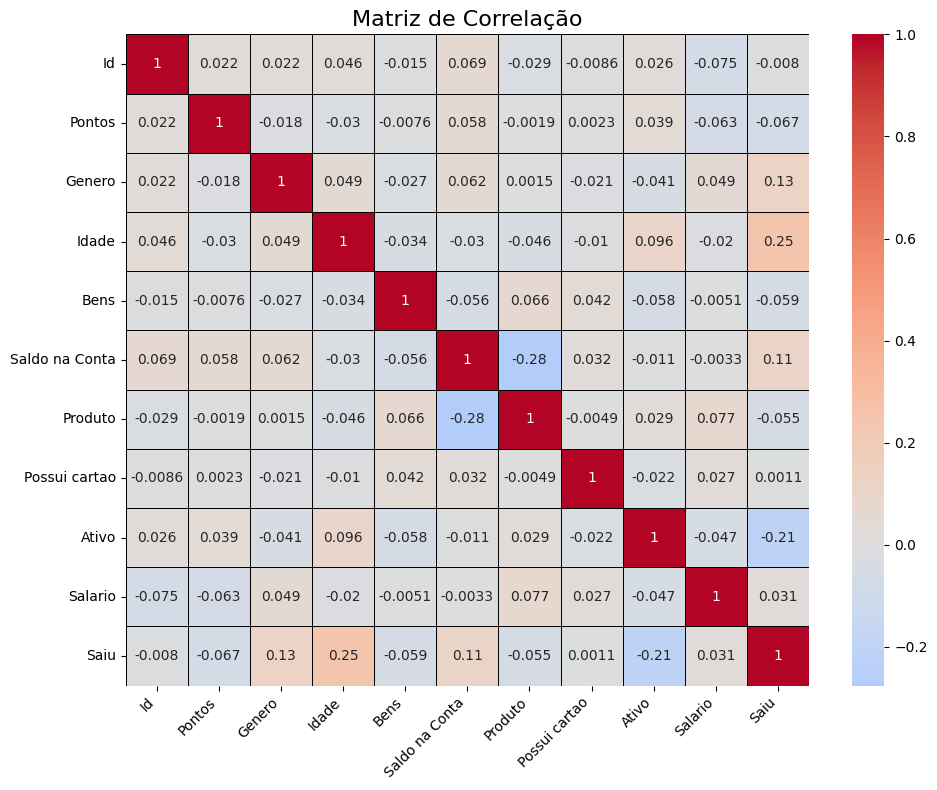

In [ ]:
# Teste de correlação entre Genero e demais variáveis, principalmente a saída/churn
data_teste = df.copy()

def transforma_genero(genero):
  if genero == 'Feminino':
    return 1
  else:
    return 0

data_teste['Genero'] = data_teste['Genero'].apply(transforma_genero)

matriz_correlacao = data_teste.corr(numeric_only=True)

# Configuração do tamanho da figura
plt.figure(figsize=(10, 8))

# Criação do heatmap da matriz de correlação
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', center=0, linewidths=0.5, linecolor='black')

# Configuração dos títulos e rótulos
plt.title('Matriz de Correlação', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Exibição do gráfico
plt.tight_layout()
plt.show()


In [ ]:
# Dada a fraca correlação entre Genero e as demais variáveis, uma estratégia viável é a substituição dos valores nulos de gênero pela moda dos valores
moda_genero = df['Genero'].mode()[0]
df['Genero'].fillna(moda_genero, inplace=True)

df['Genero'].unique()

array(['Feminino', 'Masculino'], dtype=object)

In [ ]:
# Utilização da mediana para substituição dos valores em falta para salário
mediana_salario = df['Salario'].median()
df['Salario'].fillna(mediana_salario, inplace=True)

df.isnull().sum().to_frame()

,0
Id,0
Pontos,0
Estado,0
Genero,0
Idade,0
Bens,0
Saldo na Conta,0
Produto,0
Possui cartao,0
Ativo,0


In [ ]:
# Correção de valores para idade
mediana_idade = df['Idade'].median()

indices_registros_incongruentes = df.loc[(df['Idade'] < 18) | (df['Idade'] > 100)].index
df['Idade'].iloc[indices_registros_incongruentes] = mediana_idade

df.describe()

<ipython-input-21-633d51426d93>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Idade'].iloc[indices_registros_incongruentes] = mediana_idade


,Id,Pontos,Idade,Bens,Saldo na Conta,Produto,Possui cartao,Ativo,Salario,Saiu
count,998.000000,998.000000,998.000000,998.000000,9.980000e+02,998.000000,998.000000,998.00000,9.980000e+02,998.000000
mean,499.500000,648.605210,39.094188,5.073146,7.162423e+06,1.526052,0.703407,0.51002,3.511929e+07,0.203407
std,288.242086,98.312117,10.314179,2.926320,6.314508e+06,0.574293,0.456985,0.50015,5.289854e+08,0.402734
min,1.000000,376.000000,18.000000,0.000000,0.000000e+00,1.000000,0.000000,0.00000,9.677000e+03,0.000000
25%,250.250000,580.000000,32.000000,2.000000,0.000000e+00,1.000000,0.000000,0.00000,3.075784e+06,0.000000
50%,499.500000,653.000000,37.000000,5.000000,8.926348e+06,1.000000,1.000000,1.00000,8.695742e+06,0.000000
75%,748.750000,721.000000,44.000000,8.000000,1.258767e+07,2.000000,1.000000,1.00000,1.401381e+07,0.000000
max,998.000000,850.000000,82.000000,10.000000,2.117743e+07,4.000000,1.000000,1.00000,1.193469e+10,1.000000


### 3) Análise descritiva dos dados:
#### **Objetivos**:
- Aplicar estatística descritiva para obter informações relevantes sobre os dados, mais especificamente sobre as saídas
- Agrupar colunas e explorar resultados
- Explorar relacionamentos entre variáveis

In [ ]:
df.columns

Index(['Id', 'Pontos', 'Estado', 'Genero', 'Idade', 'Bens', 'Saldo na Conta',
       'Produto', 'Possui cartao', 'Ativo', 'Salario', 'Saiu'],
      dtype='object')

In [ ]:
# Calculando taxa geral de churn/abandono:
proporcao_churn = df['Saiu'].value_counts(normalize=True) * 100
proporcao_churn = proporcao_churn.to_frame()
proporcao_churn.columns = ['Proporção']
proporcao_churn.index.name = 'Saída'
proporcao_churn.index = ['Permanência', 'Abandono']

proporcao_churn

,Proporção
Permanência,79.659319
Abandono,20.340681


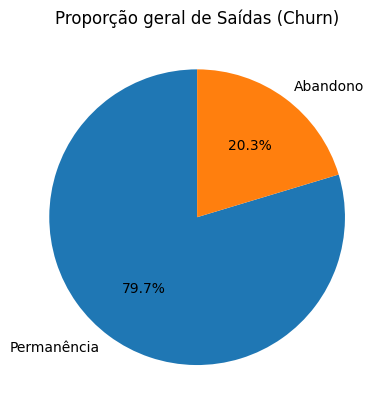

In [ ]:
# Visualização da quantidade geral de saídas quantificada nos registros (churn)
plt.pie(proporcao_churn['Proporção'], labels=proporcao_churn.index, autopct='%1.1f%%', startangle=90);
plt.title('Proporção geral de Saídas (Churn)');

In [ ]:
# Agrupando dados de idade para visualização entre quantidade de churn/abandono por faixa etária
# Definindo intervalos de faixa etária conforme Regra de Sturges (k = log2(N))
k = round(1 + np.log2(len(df)))

min_idade = df['Idade'].min()
max_idade = df['Idade'].max()

intervalos = np.linspace(min_idade, max_idade, k + 1)
intervalos = np.round(intervalos).astype(int)

labels = [f'{intervalos[i]}-{intervalos[i+1]-1}' for i in range(len(intervalos)-1)]

df['Faixa_Etaria'] = pd.cut(df['Idade'], bins=intervalos, labels=labels, right=False)
churn_por_faixa_etaria = df.groupby(['Faixa_Etaria', 'Saiu']).size().unstack(fill_value=0)

churn_por_faixa_etaria.columns = ['Permanência', 'Abandono']
churn_por_faixa_etaria

,Permanência,Abandono
Faixa_Etaria,,
18-23,20,1
24-29,122,10
30-34,179,15
35-40,240,43
41-46,129,53
47-52,41,39
53-58,29,20
59-64,12,17
65-69,11,5


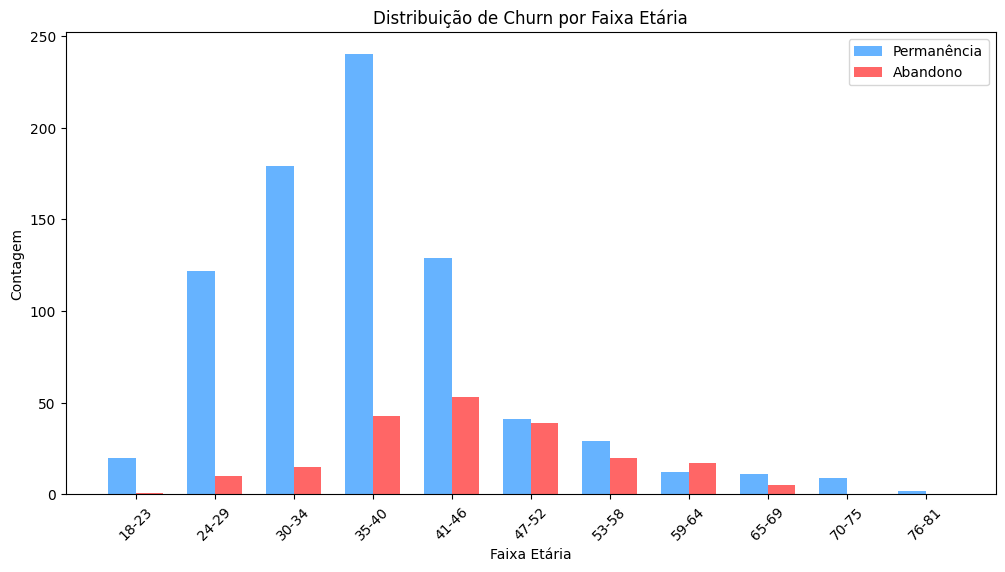

In [ ]:
# Visualização da quantidade de churn por faixa etária
fig, ax = plt.subplots(figsize=(12, 6))

# Definir a largura das barras e a posição dos rótulos no eixo x
bar_width = 0.35
index = np.arange(len(churn_por_faixa_etaria))

# Plotar as barras
bar1 = ax.bar(index, churn_por_faixa_etaria['Permanência'], bar_width, label='Permanência', color='#66b3ff')
bar2 = ax.bar(index + bar_width, churn_por_faixa_etaria['Abandono'], bar_width, label='Abandono', color='#ff6666')

# Adicionar título e rótulos aos eixos
ax.set_title('Distribuição de Churn por Faixa Etária')
ax.set_xlabel('Faixa Etária')
ax.set_ylabel('Contagem')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(churn_por_faixa_etaria.index, rotation=45)

# Adicionar a legenda
ax.legend()

# Mostrar o gráfico
plt.show()

In [ ]:
# Analisando proporção de churn em relação ao gênero dos clientes
churn_por_genero = df.groupby('Genero')[['Saiu']].value_counts(normalize=True) * 100
churn_por_genero = churn_por_genero.unstack(fill_value=0)
churn_por_genero.columns = ['Permanência', 'Abandono']
churn_por_genero

,Permanência,Abandono
Genero,,
Feminino,74.082073,25.917927
Masculino,84.485981,15.514019


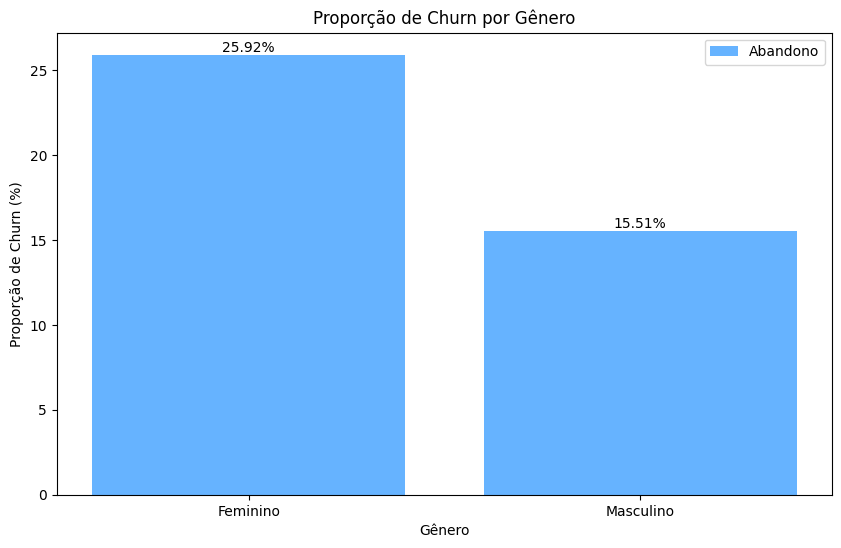

In [ ]:
# Visualizando dados de churn em relação ao gênero
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(churn_por_genero.index, churn_por_genero['Abandono'], label='Abandono', color='#66b3ff')

# Adicionar título e rótulos aos eixos
ax.set_xlabel('Gênero')
ax.set_ylabel('Proporção de Churn (%)')
ax.set_title('Proporção de Churn por Gênero')
ax.legend()

# Adicionar os valores dentro das barras
for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2.0,  # posição x
        height,  # posição y
        f'{height:.2f}%',  # texto a ser exibido
        ha='center',  # alinhamento horizontal
        va='bottom'  # alinhamento vertical
    )

# Mostrar o gráfico
plt.show()

In [ ]:
# Analisando evasão por estado
evasao_por_estado = df.groupby('Estado')[['Saiu']].value_counts()
evasao_por_estado = evasao_por_estado.unstack(fill_value=0)
evasao_por_estado.columns = ['Permanência', 'Abandono']
evasao_por_estado

,Permanência,Abandono
Estado,,
BA,12,2
CE,379,126
MA,388,74
MG,9,0
RJ,4,0
SP,3,1


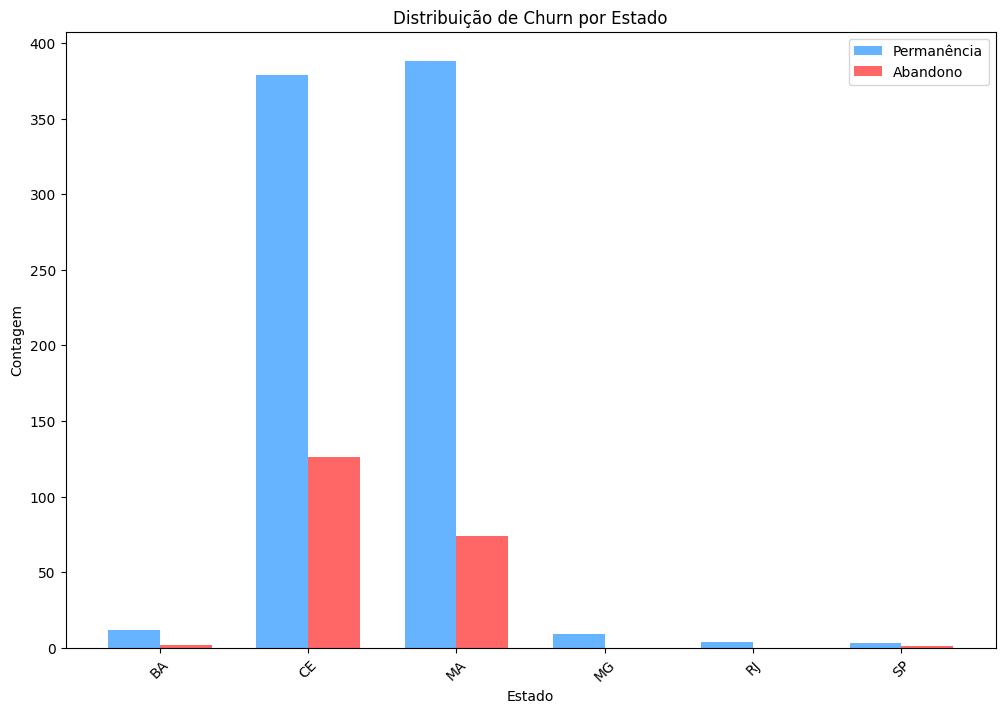

In [ ]:
# Visualizando estados e abandonos (churn)
# Visualização da quantidade de churn por faixa etária
fig, ax = plt.subplots(figsize=(12, 8))

# Definir a largura das barras e a posição dos rótulos no eixo x
bar_width = 0.35
index = np.arange(len(evasao_por_estado))

# Plotar as barras
bar1 = ax.bar(index, evasao_por_estado['Permanência'], bar_width, label='Permanência', color='#66b3ff')
bar2 = ax.bar(index + bar_width, evasao_por_estado['Abandono'], bar_width, label='Abandono', color='#ff6666')

# Adicionar título e rótulos aos eixos
ax.set_title('Distribuição de Churn por Estado')
ax.set_xlabel('Estado')
ax.set_ylabel('Contagem')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(evasao_por_estado.index, rotation=45)

# Adicionar a legenda
ax.legend()

# Mostrar o gráfico
plt.show()

<Axes: >

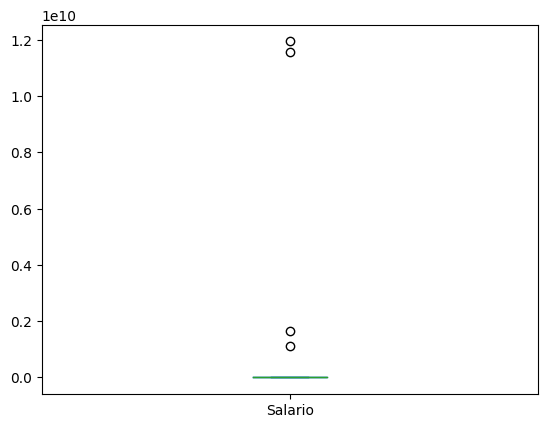

In [ ]:
# Análise da relação entre salário e churn
df['Salario'].plot(kind='box')

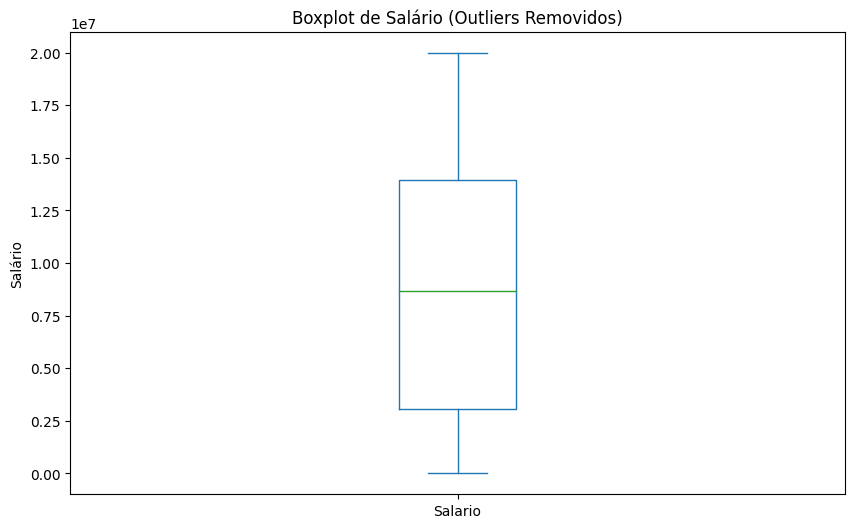

In [ ]:
# Remoção de outliers da variável salário
# Removendo outliers usando o método do IQR
Q1 = df['Salario'].quantile(0.25)
Q3 = df['Salario'].quantile(0.75)
IQR = Q3 - Q1

# Definindo limites
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrando o DataFrame
df_no_outliers = df[(df['Salario'] >= lower_bound) & (df['Salario'] <= upper_bound)]

# Plotando boxplot sem outliers
plt.figure(figsize=(10, 6))
df_no_outliers['Salario'].plot(kind='box')
plt.ylabel('Salário')
plt.title('Boxplot de Salário (Outliers Removidos)')
plt.show()

<Axes: ylabel='Frequency'>

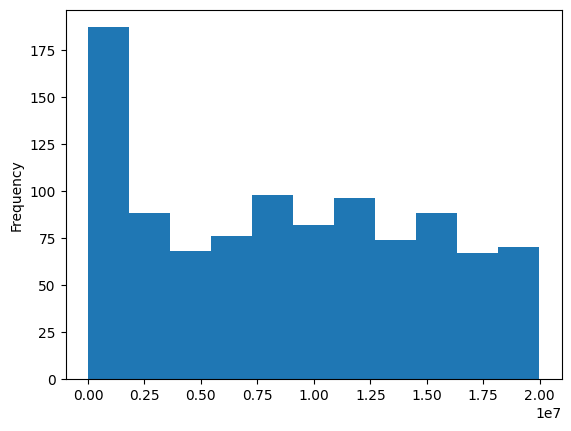

In [ ]:
# Visualização do histograma com qtd de intervalos usando regra de sturges
df_no_outliers['Salario'].plot(kind='hist', bins=k)

In [ ]:
# Agrupando dados de idade para visualização entre quantidade de churn/abandono por salário
# Definindo intervalos de faixa etária conforme Regra de Sturges (k = log2(N))
k = round(1 + np.log2(len(df_no_outliers)))

min = df_no_outliers['Salario'].min()
max = df_no_outliers['Salario'].max()

intervalos = np.linspace(min, max, k + 1)
intervalos = np.round(intervalos).astype(int)

labels = [f'{intervalos[i]}-{intervalos[i+1]-1}' for i in range(len(intervalos)-1)]

df_no_outliers['Faixa Salarial'] = pd.cut(df_no_outliers['Salario'], bins=intervalos, labels=labels, right=False)
churn_por_salario = df_no_outliers.groupby(['Faixa Salarial'])[['Saiu']].value_counts(normalize=True) * 100
churn_por_salario = churn_por_salario.unstack(fill_value=0)

churn_por_salario.columns = ['Permanência', 'Abandono']
churn_por_salario

<ipython-input-74-c89b934916af>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['Faixa Salarial'] = pd.cut(df_no_outliers['Salario'], bins=intervalos, labels=labels, right=False)


,Permanência,Abandono
Faixa Salarial,,
9677-1824482,80.213904,19.786096
1824483-3639287,76.136364,23.863636
3639288-5454093,82.352941,17.647059
5454094-7268899,77.631579,22.368421
7268900-9083704,83.673469,16.326531
9083705-10898510,80.487805,19.512195
10898511-12713315,77.083333,22.916667
12713316-14528121,85.135135,14.864865
14528122-16342927,75.000000,25.000000


<Figure size 1200x800 with 0 Axes>

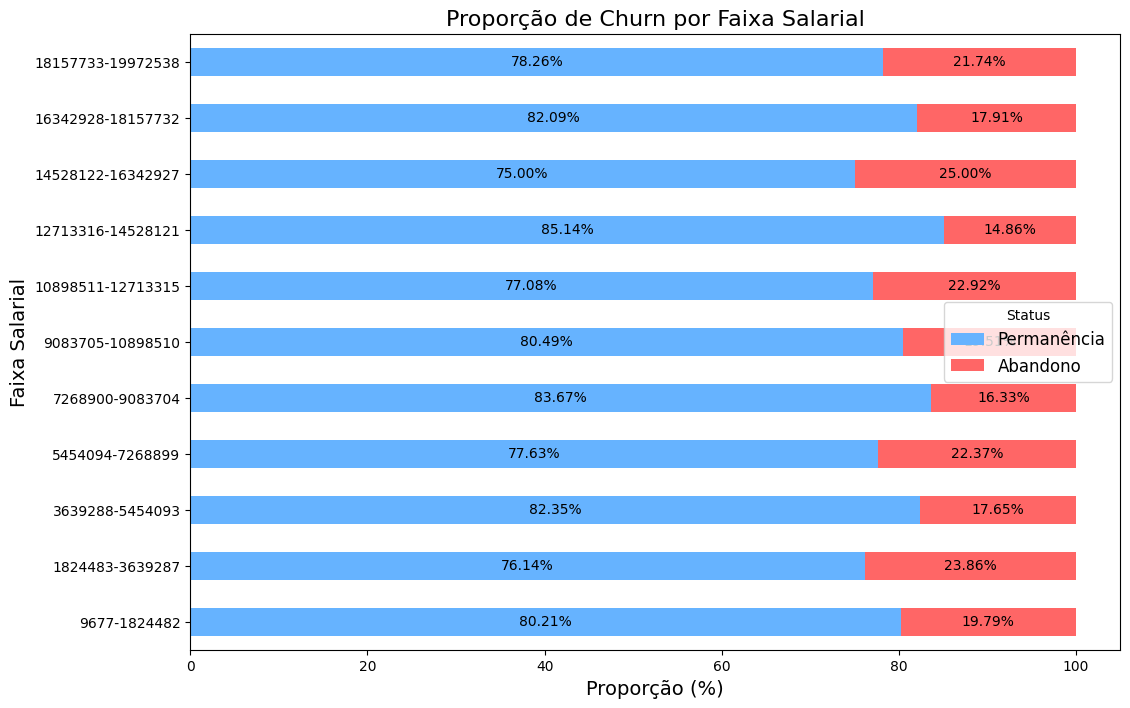

In [ ]:
# Plotando os dados
plt.figure(figsize=(12, 8))
ax = churn_por_salario.plot(kind='barh', stacked=True, color=['#66b3ff', '#ff6666'], figsize=(12, 8))

# Adicionando rótulos de valor
for bars in ax.containers:
    ax.bar_label(bars, fmt='%.2f%%', label_type='center')

# Ajustando o título e os rótulos dos eixos
plt.title('Proporção de Churn por Faixa Salarial', fontsize=16)
plt.xlabel('Proporção (%)', fontsize=14)
plt.ylabel('Faixa Salarial', fontsize=14)
plt.legend(title='Status', fontsize=12)
plt.show()

In [ ]:
# Analise do churn por produto
churn_por_produto = df.groupby('Produto')[['Saiu']].value_counts(normalize=True) * 100
churn_por_produto = churn_por_produto.unstack(fill_value=0)
churn_por_produto.columns = ['Permanência', 'Abandono']
churn_por_produto

,Permanência,Abandono
Produto,,
1,72.407045,27.592955
2,92.904656,7.095344
3,17.647059,82.352941
4,0.000000,100.000000


<Figure size 1200x800 with 0 Axes>

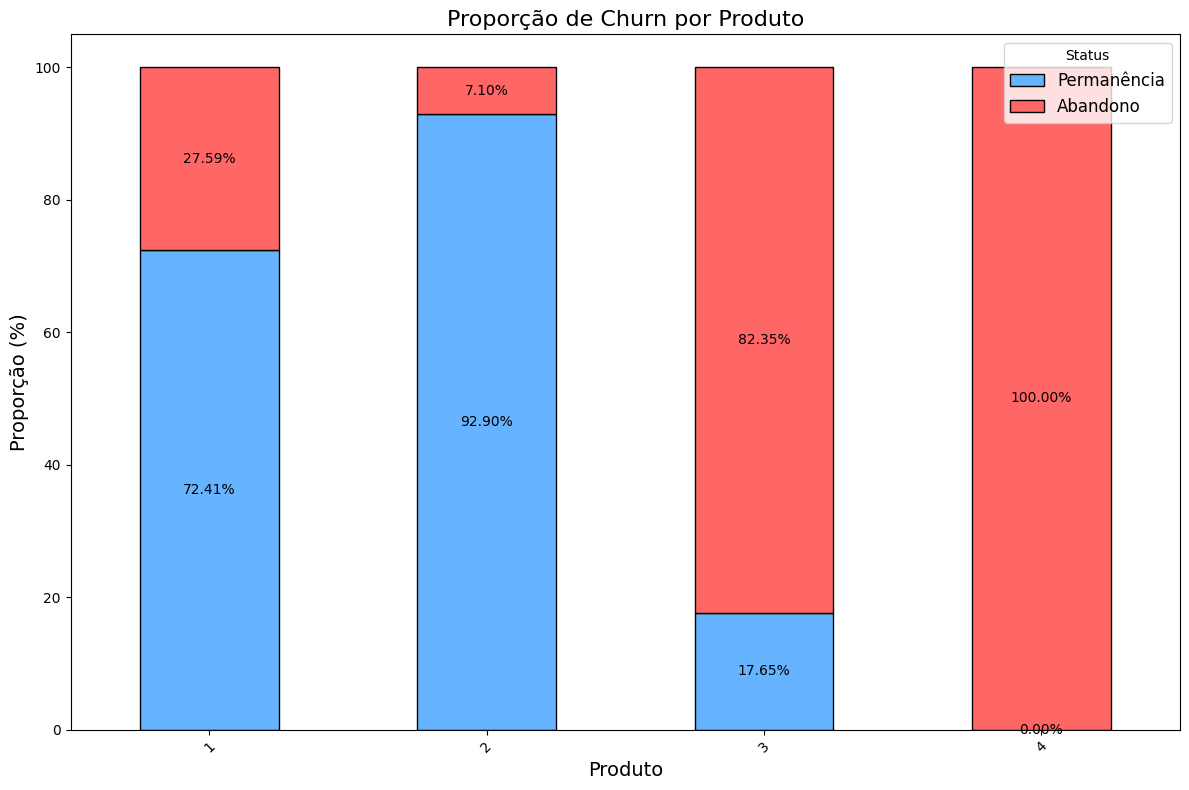

In [ ]:
# Configurando o gráfico
plt.figure(figsize=(12, 8))
ax = churn_por_produto.plot(kind='bar', stacked=True, color=['#66b3ff', '#ff6666'], figsize=(12, 8), edgecolor='black')

# Adicionando rótulos de valor
for bars in ax.containers:
    ax.bar_label(bars, fmt='%.2f%%', label_type='center', fontsize=10)

# Ajustando o título e os rótulos dos eixos
plt.title('Proporção de Churn por Produto', fontsize=16)
plt.xlabel('Produto', fontsize=14)
plt.ylabel('Proporção (%)', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Status', fontsize=12)

# Ajustando layout para evitar corte de elementos
plt.tight_layout()

# Exibindo o gráfico
plt.show()

<Axes: >

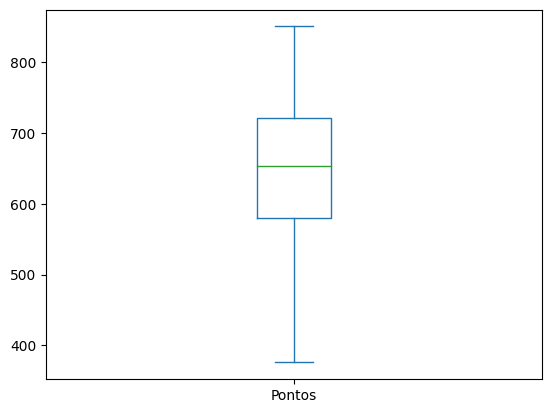

In [ ]:
# Análise de churn por quantidade de pontos
df['Pontos'].plot(kind='box')

count    998.000000
mean     648.605210
std       98.312117
min      376.000000
25%      580.000000
50%      653.000000
75%      721.000000
max      850.000000
Name: Pontos, dtype: float64

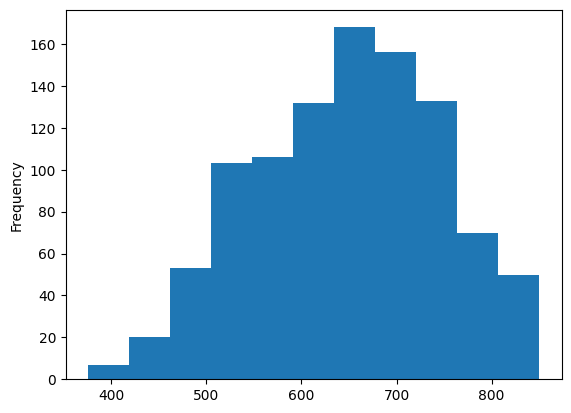

In [ ]:
df['Pontos'].plot(kind='hist', bins=11)
df['Pontos'].describe()

In [ ]:
# Criando intervalos para os pontos
min = df['Pontos'].min()
max = df['Pontos'].max()

intervalos = np.linspace(min, max, k + 1)
intervalos = np.round(intervalos).astype(int)

labels = [f'{intervalos[i]}-{intervalos[i+1]-1}' for i in range(len(intervalos)-1)]

df['Faixa de Pontos'] = pd.cut(df['Pontos'], bins=intervalos, labels=labels, right=False)
churn_por_pontos = df.groupby(['Faixa de Pontos'])[['Saiu']].value_counts(normalize=True) * 100
churn_por_pontos = churn_por_pontos.unstack(fill_value=0)

churn_por_pontos.columns = ['Permanência', 'Abandono']
churn_por_pontos

,Permanência,Abandono
Faixa de Pontos,,
376-418,71.428571,28.571429
419-461,70.000000,30.000000
462-504,76.923077,23.076923
505-547,77.450980,22.549020
548-590,77.884615,22.115385
591-634,78.676471,21.323529
635-677,77.380952,22.619048
678-720,84.615385,15.384615
721-763,77.443609,22.556391


<Figure size 1200x800 with 0 Axes>

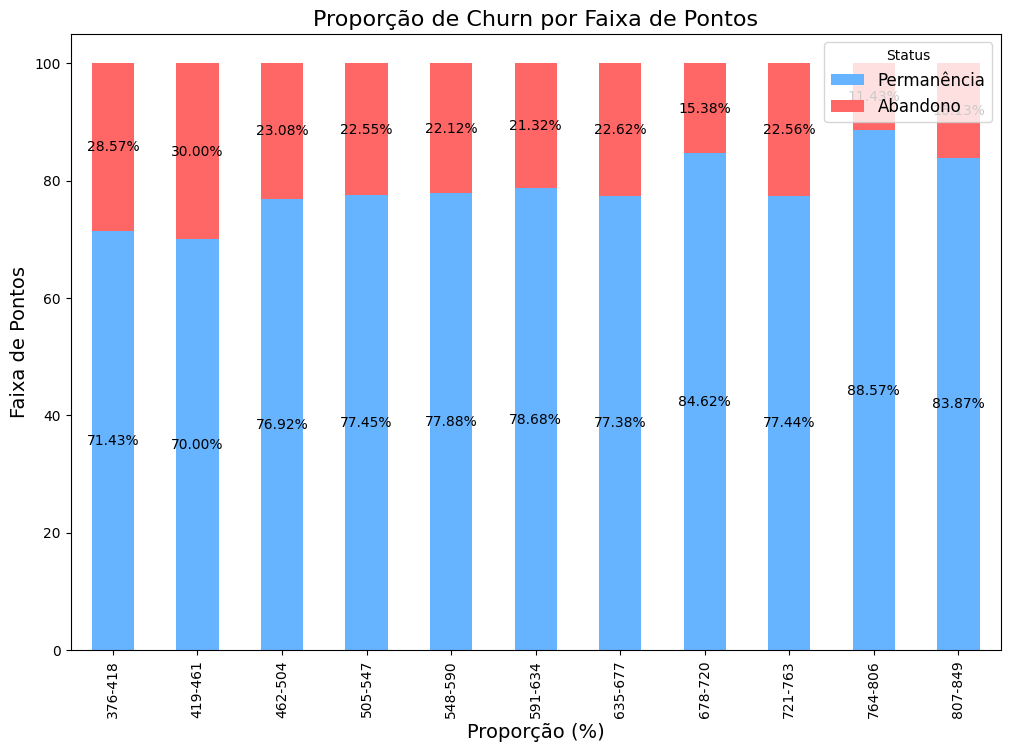

In [ ]:
# Plotando os dados
plt.figure(figsize=(12, 8))
ax = churn_por_pontos.plot(kind='bar', stacked=True, color=['#66b3ff', '#ff6666'], figsize=(12, 8))

# Adicionando rótulos de valor
for bars in ax.containers:
    ax.bar_label(bars, fmt='%.2f%%', label_type='center')

# Ajustando o título e os rótulos dos eixos
plt.title('Proporção de Churn por Faixa de Pontos', fontsize=16)
plt.xlabel('Proporção (%)', fontsize=14)
plt.ylabel('Faixa de Pontos', fontsize=14)
plt.legend(title='Status', fontsize=12)
plt.show()